In [ ]:
!pip install pedalboard


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 7.0 MB/s 


In [ ]:
!pip install midiutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.2 MB/s 
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54566 sha256=5878aa43696f2ac94ea0cac76daf07a713eb57f7268a33b270881b57e423582b
  Stored in directory: /root/.cache/pip/wheels/55/14/ba/8d51301658e4a79bbcc3a1a1fd3ea32abc72798fc9e92b56fa
Successfully built midiutil


In [ ]:
#importing modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython.display as ipd
import random


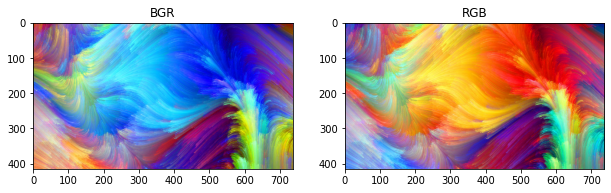

           Image Properties
Height =  415 Width =  737
Number of pixels in image =  305855


In [ ]:
#Load the image
ori_img = cv2.imread('colors.jpg')
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)

#Get shape of image
height, width, depth = img.shape
dpi = plt.rcParams['figure.dpi']#generate multiple plots and need them all to be the same size.
figsize = width / float(dpi), height / float(dpi)

#Plot the image
fig, axs = plt.subplots(1, 2, figsize = figsize)
axs[0].title.set_text('BGR') 
axs[0].imshow(ori_img)
axs[1].title.set_text('RGB') 
axs[1].imshow(img)
plt.show()
print('           Image Properties')
print('Height = ',height, 'Width = ', width)
print('Number of pixels in image = ', height * width)

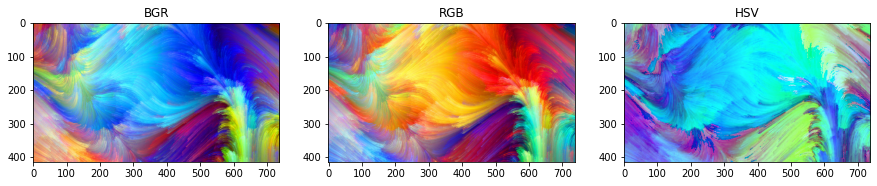

In [ ]:
#Need function that reads pixel hue value 
hsv = cv2.cvtColor(ori_img, cv2.COLOR_BGR2HSV)
#Plot the image
fig, axs = plt.subplots(1, 3, figsize = (15,15))
names = ['BGR','RGB','HSV']
imgs  = [ori_img, img, hsv]
i = 0
for elem in imgs:
    axs[i].title.set_text(names[i])
    axs[i].imshow(elem)
    axs[i].grid(False)
    i += 1
plt.show()

In [ ]:
i=0 ; j=0
#Initialize array the will contain Hues for every pixel in image
hues = [] 
for i in range(height):
    for j in range(width):
        hue = hsv[i][j][0] #This is the hue value at pixel coordinate (i,j)
        hues.append(hue)

In [ ]:
pixels_df = pd.DataFrame(hues, columns=['hues'])
pixels_df

,hues
0,112
1,113
2,111
3,108
4,108
...,...
305850,95
305851,95
305852,98
305853,100


In [ ]:
#Define frequencies that make up A-Harmonic Minor Scale
scale_freqs = [220.00, 246.94 ,261.63, 293.66, 329.63, 349.23, 415.30] 
def hue2freq(h,scale_freqs):
    thresholds = [26 , 52 , 78 , 104,  128 , 154 , 180]
    note = scale_freqs[0]
    if (h <= thresholds[0]):
         note = scale_freqs[0]
    elif (h > thresholds[0]) & (h <= thresholds[1]):
        note = scale_freqs[1]
    elif (h > thresholds[1]) & (h <= thresholds[2]):
        note = scale_freqs[2]
    elif (h > thresholds[2]) & (h <= thresholds[3]):
        note = scale_freqs[3]
    elif (h > thresholds[3]) & (h <= thresholds[4]):    
        note = scale_freqs[4]
    elif (h > thresholds[4]) & (h <= thresholds[5]):
        note = scale_freqs[5]
    elif (h > thresholds[5]) & (h <= thresholds[6]):
        note = scale_freqs[6]
    else:
        note = scale_freqs[0]
    
    return note
    

In [ ]:
pixels_df['notes'] = pixels_df.apply(lambda row : hue2freq(row['hues'],scale_freqs), axis = 1)     
pixels_df

,hues,notes
0,112,329.63
1,113,329.63
2,111,329.63
3,108,329.63
4,108,329.63
...,...,...
305850,95,293.66
305851,95,293.66
305852,98,293.66
305853,100,293.66


In [ ]:
frequencies = pixels_df['notes'].to_numpy()

In [ ]:
song = np.array([]) 
sr = 22050 # sample rate
T = 0.1    # 0.1 second duration
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#Make a song with numpy array :]
#nPixels = int(len(frequencies))#All pixels in image
nPixels = 60
for i in range(nPixels):  
    val = frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr) # load a NumPy array

In [ ]:
from scipy.io import wavfile
wavfile.write('ini_song.wav'    , rate = 22050, data = song.astype(np.float32))

In [ ]:
song = np.array([]) 
octaves = np.array([0.5,1,2])
sr = 22050 # sample rate
T = 0.1    # 0.1 second duration
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#Make a song with numpy array :]
#nPixels = int(len(frequencies))#All pixels in image
nPixels = 60
for i in range(nPixels):
    octave = random.choice(octaves)
    val =  octave * frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr) # load a NumPy array

In [ ]:
wavfile.write('octave_song.wav'    , rate = 22050, data = song.astype(np.float32))